A2 de Linguagens de Programação – 26/11/2018
--
Professor: Renato Rocha Souza  
--

Nome do Aluno(a):

In [424]:
meu_nome = input('Entre com o seu nome completo: ')
print('Olá, {}!'.format(meu_nome))
print('Bom trabalho!')

Entre com o seu nome completo: Vitoria Mesquita Leite
Olá, Vitoria Mesquita Leite!
Bom trabalho!


In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import random
import re
import string
import time
import pymysql
import sqlite3
import getpass
import pandas.io.sql as psql
import networkx as nx
from IPython.display import clear_output
%matplotlib inline

Questão 1 (1,0 ponto):  

Utilizando Python + SQL, crie uma tabela "aluno" em banco de dados no sqlite que tenha os seguintes campos:

+ id 
+ nome
+ data_nascimento
+ matricula

Escolha os tipos de dados apropriados. O campo id é chave primária, e deve ser autoincrementável. 

Veja:  
https://sqlite.org/datatype3.html    
https://sqlite.org/autoinc.html  
https://www.tutorialspoint.com/sqlite/sqlite_update_query.htm  

In [427]:
conn = sqlite3.connect('../../Dados/meudatabase.sqlite')
cur = conn.cursor()

In [429]:
f='''
create table dados_alunos(id  INTEGER PRIMARY KEY AUTOINCREMENT, nome VARCHAR(50), data_nascimento DATE, matricula INT)
'''
cur.execute(f)
cur.fetchall()

OperationalError: table dados_alunos already exists

Questão 2 (1.5 ponto):  

Conecte ao banco SQLite "iris_database.sqlite"e responda, demonstrando os comandos Python + SQL apropriados:  

a) Há quantas "Species" diferentes na tabela "iris"?  
b) Quantos registros totais há na tabela "iris"?  

Considerando a superfície das pétalas e sépalas como retangular, responda:  

c) Qual espécie ("Species") contém, em média, a maior área de pétalas?  
d) Qual espécie ("Species") contém, em média, a maior área total (pétalas e sépalas)?  

(Por curiosidade, as espécies de Iris contém 3 pétalas e 3 sépalas)  

In [430]:
conn = sqlite3.connect('../../Dados/iris_database.sqlite')
cur = conn.cursor()

In [431]:
#a)
f='''
select count(distinct Species) from iris
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

(3,)


In [432]:
#b)
f='''
select count(*) from iris
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

(150,)


In [433]:
#c)
f='''
select Species,avg(PetalLengthCm*PetalWidthCm) from iris group by Species limit 1
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

('Iris-setosa', 0.36280000000000023)


In [434]:
#d)
f='''
select Species,avg(PetalLengthCm*PetalWidthCm)+avg(SepalLengthCm*SepalWidthCm) from iris group by Species order by avg(PetalLengthCm*PetalWidthCm+SepalLengthCm*SepalWidthCm) DESC limit 1 
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

('Iris-virginica', 30.980799999999995)


Questão 3 (1.5 pontos):  

Importe o arquivo ../../Dados/votesurvey.xls para um dataframe do Python usando o método apropriado, e responda às questões:  

a) Exiba as 15 primeiras linhas (essa é muito fácil!).  
b) Qual a média de salário desejado, dentre os eleitores de cada presidente?  
c) Qual fator tem maior influência sobre o salário atual? Sexo ou Idade?  
d) Crie uma nova coluna no dataframe original que exiba o salário atual dividido pela idade.  

In [435]:
df_vote = pd.read_excel('../../Dados/votesurvey.xls')

In [436]:
#a)
df_vote.iloc[0:15,0:5]


,Gender,Age,Salary before Stern,Expected salary,Candidate
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush
5,Male,32,150000,150000,Bush
6,Female,24,55000,100000,Bush
7,Male,30,110000,150000,Bush
8,Male,26,48000,80000,Bush
9,Male,26,120000,80000,Bush


In [437]:
df_bush=df_vote[df_vote.Candidate=='Bush']
df_gore=df_vote[df_vote.Candidate=='Gore']
df_refuse=df_vote[df_vote.Candidate=='Refuse to answer']
df_ind=df_vote[df_vote.Candidate=='Undecided']

In [438]:
#b)
bush=sum(df_bush['Expected salary'])/15
bush

111666.66666666667

In [439]:
gore=sum(df_gore['Expected salary'])/18
gore

103055.55555555556

In [138]:
refuse=sum(df_refuse['Expected salary'])/10
refuse

119500.0

In [139]:
ind=sum(df_ind['Expected salary'])/5
ind

103000.0

In [ ]:
#c) pego a tabela de salarios de homens e mulheres

In [48]:
df_homens=df_vote[df_vote.Gender=='Male']
df_mulher=df_vote[df_vote.Gender=='Female']

In [76]:
a=sum(df_homens['Salary before Stern'])/34 #media salarial masculina
a

73705.88235294117

In [77]:
b=sum(df_mulher['Salary before Stern'])/14 #media salarial feminina
b

61500.0

In [51]:
sum(df_vote['Age'])/48 #media de idade

27.1875

In [114]:
df_maiorque=df_vote[df_vote.Age>27.1875]

In [53]:
df_menorque=df_vote[df_vote.Age<27.1875]

In [61]:
c=sum(df_maiorque['Salary before Stern'])/19 #media salarial dos mais velhos

In [62]:
d=sum(df_menorque['Salary before Stern'])/29 #media salarial dos mais novos

In [63]:
difGender=(a-b)**2
difGender

148983564.0138408

In [64]:
difAge=(c-d)**2
difAge

423493074.7922438

In [68]:
#a diferença é maior na idade, então essa tem maior influencia 

In [440]:
for x in range(48):
    df_vote.iloc[x,5]= df_vote.iloc[x,2]/ df_vote.iloc[x,1]

IndexError: single positional indexer is out-of-bounds

In [92]:
#d)
df_vote

,Gender,Age,Salary before Stern,Expected salary,Candidate,media_sal
0,Male,27,60000,110000,Bush,2222.222222
1,Male,30,125000,125000,Bush,4166.666667
2,Male,27,50000,120000,Bush,1851.851852
3,Male,26,56000,100000,Bush,2153.846154
4,Male,27,82000,100000,Bush,3037.037037
5,Male,32,150000,150000,Bush,4687.500000
6,Female,24,55000,100000,Bush,2291.666667
7,Male,30,110000,150000,Bush,3666.666667
8,Male,26,48000,80000,Bush,1846.153846
9,Male,26,120000,80000,Bush,4615.384615


Questão 4 (1.5 pontos): 

Transforme o arquivo ../../Dados/DomCasmurroMachadoAssis.txt em uma string no Python e responda, usando, quando possível, expressões regulares:  

a) Quais as 10 palavras mais frequentes que _começam_ com "a" ou "A"?  
b) Quantas palavras distintas que começam com letras _maiúsculas_ há no texto?  
c) Quantas palavras há no texto com apenas uma; com apenas duas; e com apenas 3 vogais?  

In [441]:
with open ('../../Dados/DomCasmurroMachadoAssis.txt','r') as f:
    texto=f.read()

In [442]:
#a)

In [443]:
starta=re.findall(r'\b[Aa]\w*\b',texto)
starta= [p.strip(string.punctuation)for p in starta]
starta= [p.strip('\n') for p in starta]
starta= [p.strip('\ufeff') for p in starta]
starta= [p.strip(' ') for p in starta]

In [444]:
freqdist = {}
for palavra in starta:
    if palavra in freqdist:
        freqdist[palavra] += 1
    else:
        freqdist[palavra] = 1
freqdist

{'apaixonar': 1,
 'Any': 1,
 'attenuar': 1,
 'apoiou': 1,
 'acompanham': 1,
 'adivinhei': 1,
 'attenta': 3,
 'an': 6,
 'affirmação': 2,
 'access': 10,
 'achado': 4,
 'acena': 1,
 'archeologia': 1,
 'aged': 1,
 'applicable': 3,
 'astronomica': 1,
 'Approximei': 1,
 'allusão': 2,
 'atrevo': 1,
 'affectos': 1,
 'achar': 14,
 'agradar': 2,
 'Ashaverus': 3,
 'allivio': 2,
 'accepção': 1,
 'archanjo': 3,
 'achatando': 1,
 'apresentaram': 1,
 'Achavam': 1,
 'abraçal': 2,
 'accordei': 2,
 'architecto': 1,
 'assobia': 1,
 'argolas': 1,
 'arrepios': 1,
 'aproveitei': 1,
 'adoptar': 1,
 'approvasse': 1,
 'affirmou': 1,
 'acaba': 2,
 'attinge': 1,
 'Additional': 1,
 'arrastava': 1,
 'apoio': 2,
 'aguenta': 2,
 'almoçar': 3,
 'acabou': 27,
 'adivinhavam': 2,
 'alteraram': 1,
 'authentico': 1,
 'algumas': 35,
 'Aquelles': 1,
 'agent': 1,
 'aqui': 82,
 'attentamente': 1,
 'Arranjavamos': 1,
 'ave': 7,
 'acanhado': 1,
 'affirma': 1,
 'andorinhas': 6,
 'arrufámos': 1,
 'abrissemos': 1,
 'aspecto': 6,
 

In [445]:
for k in range(0,10):
    m=max(freqdist,key=freqdist.get)
    v=max(freqdist.values())
    print('o {}° é "{}" e aparece {} vezes'.format(k+1,m,v))
    freqdist[m]=0

o 1° é "a" e aparece 2414 vezes
o 2° é "as" e aparece 543 vezes
o 3° é "ao" e aparece 330 vezes
o 4° é "A" e aparece 257 vezes
o 5° é "ainda" e aparece 129 vezes
o 6° é "assim" e aparece 120 vezes
o 7° é "agora" e aparece 118 vezes
o 8° é "até" e aparece 97 vezes
o 9° é "aos" e aparece 85 vezes
o 10° é "aqui" e aparece 82 vezes


In [450]:
#b)

maiusculas=re.findall(r'\b[A-ZÁÉÍÓÚÂÊÔÛÀÈÌÒÙÇÃÕ]\w*\b',texto)
maiusculas= {p.strip(string.punctuation)for p in maiusculas}
maiusculas= {p.strip('\n') for p in maiusculas}
maiusculas= {p.strip('\ufeff') for p in maiusculas}
maiusculas= {p.strip(' ') for p in maiusculas}
len(maiusculas)

1521

In [452]:
#c)
uma_vogal=re.findall(r'\b[^aeiouAEIOU àáãâóõôíúéêÁÉÍÓÚÂÊÔ]*[aeiouAEIOUáãâóõôíúéêÁÉÍÓÚÂÊÔ][^aeiouAEIOU áãâóõôíúéêÁÉÍÓÚÂÊÔ]*\b',texto)
L1_vogal=[p.strip(string.punctuation)for p in uma_vogal]
L1_vogal=[p.strip('\n')for p in L1_vogal]
L1_vogal=[p.strip(' ')for p in L1_vogal]
len(L1_vogal)

23473

In [146]:
duas_vogal = re.findall(r'\b[^aeiouAEIOU áãóõôíúéê]*[aeiouAEIOUáàãóõôíúéê][^aeiouAEIOUáàãóõôíúéê ]*[aeiouAEIOUáàãóõôíúéê][^aeiouAEIOU áãóõôíúéê]*\b',texto)
L2_vogal=[p.strip(string.punctuation)for p in duas_vogal]
L2_vogal=[p.strip('\n')for p in L2_vogal]
L2_vogal=[p.strip(' ')for p in L2_vogal]
len(L2_vogal)

25264

In [148]:
tres_vogal = re.findall(r'\b[^aeiouAEIOU áãóõôíúéê]*[aeiouAEIOUáàãóõôíúéê][^aeiouAEIOU áãóõôíúéê]*[aeiouAEIOUáàãóõôíúéê][^aeiouAEIOUáàãóõôíúéê ]*[aeiouAEIOUáàãóõôíúéê][^aeiouAEIOU áãóõôíúéê]*\b',texto)
L3_vogal=[p.strip(string.punctuation)for p in tres_vogal]
L3_vogal=[p.strip('\n')for p in L3_vogal]
L3_vogal=[p.strip(' ')for p in L3_vogal]
len(L3_vogal)

15025

Questão 5 (1.5 pontos):    

Utilizando apenas o Shell Linux, e utilizando o arquivo ../../Dados/DomCasmurroMachadoAssis.txt, diga os comandos para responder às seguintes perguntas:  

a) Quais as 10 palavras mais frequentes que _terminam_ com "a" ou "A"?  
b) Quantas palavras distintas que começam com _minúsculas_ há no texto?   
c) Como ordenar as palavras distintas por ordem de "rima"?  

In [201]:
#a)
! cat ../../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | grep '[aA]$'  | sort | uniq -c | sort -gr | sed 10q 


   2742 a
    625 da
    532 para
    468 era
    398 uma
    312 minha
    309 na
    257 A
    177 ella
    170 casa
sort: write failed: 'standard output': Broken pipe
sort: write error


In [180]:
#b)
! cat ../../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | grep '^[a-z]' | sort | uniq | wc -l

8535


In [150]:
#c)
! cat ../../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | rev | sort | rev | uniq


]
a
A
acaba
saiba
amba
emba
barba
Corityba
ca
fraca
casaca
sobrecasaca
ressaca
pataca
vacca
secca
bocca
rabeca
Bibliotheca
boneca
dedica
fatidica
indica
fica
Fica
significa
gratifica
scientifica
justifica
logica
seraphica
philosophica
encyclica
catholica
Catholica
plica
treplica
explica
Explica
polemica
astronomica
Monica
unica
communica
rica
America
Rhetorica
tisica
musica
physica
metaphysica
dramatica
pratica
prophetica
arithmetica
poetica
politica
critica
identica
botica
ecclesiastica
fantastica
mystica
therapeutica
banca
creanca
branca
franca
nunca
Nunca
boca
troca
toca
voca
Voca
evoca
equivoca
cerca
perca
forca
casca
fresca
risca
marisca
tosca
educa
Manduca
Tijuca
maluca
nuca
pouca
touca
da
Da
DA
ada
acabada
abobada
cada
Cada
achacada
complicada
pancada
cincada
cocada
cercada
escada
dada
assobradada
mandada
prendada
guardada
mudada
lisongeada
creada
fada
almofada
socegada
chegada
obrigada
castigada
zangada
engasgada
madrugada
trabalhada
palhada
atrapalhada
enxovalhada
embrulhada


Que
rodaque
duraque
ataque
sotaque
moleque
peque
ambique
fique
Fique
publique
multiplique
Applique
explique
pique
tique
remoque
toque
quoque
embarque
Albuquerque
enforque
porque
Porque
esque
risque
RUE
possue
ave
have
HAVE
chave
grave
deve
Deve
leve
Leve
breve
escreve
Escreve
teve
Teve
deteve
reteve
manteve
conteve
esteve
receive
give
GIVE
Archive
derive
tive
Tive
ative
derivative
active
defective
retive
PUNITIVE
estive
Estive
Executive
vive
survive
absolve
envolve
remove
nove
dezenove
serve
preserve
sorve
ouve
houve
Houve
we
We
vexe
deixe
Deixe
feixe
queixe
trouxe
treze
Dize
quinze
Quinze
onze
Onze
bronze
doze
quatorze
f
F
caf
pglaf
PGLAF
Chief
staff
if
If
IF
of
Of
OF
arruf
g
affag
pag
rapag
cheg
Peg
preg
vig
reading
downloading
providing
sending
including
INCLUDING
reaching
anything
ANYTHING
linking
mailing
performing
remaining
obtaining
maintaining
containing
beginning
concerning
keeping
appearing
sharing
ensuring
increasing
processing
using
indicating
creating
Creating
regulating
w

Luiz
quiz
Quiz
Dalloz
poz
compoz
recompoz
propoz
dispoz
expoz
voz
Reduz
produz
luz
puz
Puz
propuz
suppuz
Suppuz
dispuz
Expuz
cruz
Cruz
truz


Questão 6 (2.0 ponto):  

Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Leia para dataframes do Pandas as tabelas "invoices", "invoice_items", "customers" e "tracks"; e mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Crie um histograma de faixas ("tracks") mais compradas.  
c) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas ("artists") como chaves e uma lista dos álbuns ("albuns") respectivos como valores.

In [203]:
conn = sqlite3.connect('../../Dados/chinook.sqlite')
cur = conn.cursor()

In [247]:
a='''
create table auxiliar(CustomerId INT,TrackId INT)
'''
cur.execute(a)
for r in cur.fetchall():
    print(r)

In [248]:
b='''
select invoices.CustomerId,invoice_items.TrackId from invoices 
inner join invoice_items
on invoices.InvoiceId=invoice_items.InvoiceId
'''
cur.execute(b)
lista=[]
for r in cur.fetchall():
    lista.append(r)

In [249]:
sql='''
insert into auxiliar(CustomerId,TrackId) values(?,?)
'''
cur.executemany(sql,lista)
cur.fetchall()

[]

In [250]:
f='''
select tracks.Name,customers.FirstName from auxiliar
inner join customers
on customers.CustomerId=auxiliar.CustomerId
inner join tracks
on auxiliar.TrackId=tracks.TrackId
where customers.FirstName like 'M%'
'''
df_final=pd.read_sql_query(f,conn)

In [291]:
#b)

In [292]:
k='''
select tracks.Name from auxiliar
inner join customers
on customers.CustomerId=auxiliar.CustomerId
inner join tracks
on auxiliar.TrackId=tracks.TrackId
'''
df_todas=pd.read_sql_query(k,conn)

In [300]:
nometodas=[j for j in df_todas.Name]
len(nometodas)

2240

In [302]:
#b)
freq = {}
for palavra in nometodas:
    if palavra in freq:
        freq[palavra] += 1
    else:
        freq[palavra] = 1
freq

{'Love': 1,
 "Lil' Evil": 1,
 'Stand Inside Your Love': 1,
 'Commercial 2': 1,
 'Bad Seed': 1,
 'What A Day': 2,
 'Branch Closing': 2,
 'El Farol': 1,
 'Scar On the Sky': 1,
 'Beautiful Boy': 2,
 'Seventh Son of a Seventh Son': 1,
 'Overtime': 1,
 'Closer To The Heart': 1,
 'Wall Of Denial': 1,
 'Bleeding Me': 1,
 'Atrás Da Verd-E-Rosa Só Não Vai Quem Já Morreu': 1,
 'Woodpecker From Mars': 1,
 'Company Man': 1,
 'Verdade': 1,
 'Denúncia': 1,
 "Wellington's Victory or the Battle Symphony, Op.91: 2. Symphony of Triumph": 1,
 'How to Stop an Exploding Man': 2,
 'Get On The Snake': 1,
 'Sangue De Bairro': 1,
 'End Of Romanticism': 2,
 'Dancing Barefoot': 1,
 'Amanhã Não Se Sabe': 1,
 'Tea For One': 1,
 'Xanadu': 1,
 'Big Wave': 2,
 'Were Do We Go From Here': 1,
 'Um Indio': 1,
 'Mr. Crowley': 1,
 'Breaking The Rules': 1,
 'Revolta Olodum': 2,
 'Bad, Bad Leroy Brown': 1,
 "Ain't My Bitch": 1,
 'Inject The Venom': 2,
 'Travelling Riverside Blues': 1,
 'Polly': 2,
 "I Still Haven't Found Wha

In [412]:
dic=[]
dic2=[]
for k in range(0,4):
    m=max(freq,key=freq.get)
    v=max(freq.values())
    dic.append(m)
    dic2.append(v)
    print([m,v])
    freq[m]=0

['Woman Is The Nigger Of The World (Ao Vivo)', 2]
['Nothing Else Matters', 2]
['A Novidade (Live)', 2]
['Dois Pra Lá, Dois Pra Cá', 2]


In [413]:
dic2

[2, 2, 2, 2]

In [414]:
dic=dic+dic

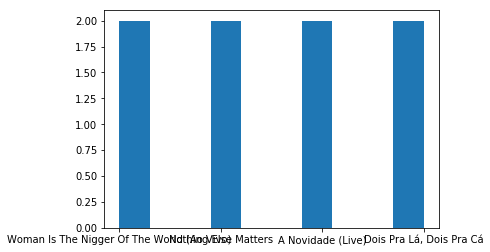

In [415]:
plt.hist(dic)
plt.show()

In [320]:
#c)
f='''
select  artists.Name,albums.Title from artists
inner join albums
on artists.ArtistId=albums.ArtistId
order by artists.Name
'''
cur.execute(f)
listad=[]
for r in cur.fetchall():

In [324]:
k='''
select  artists.Name,albums.Title from artists
inner join albums
on artists.ArtistId=albums.ArtistId
order by artists.Name
'''
df_album=pd.read_sql_query(k,conn)

In [332]:
df_album

,Name,Title
0,AC/DC,For Those About To Rock We Salute You
1,AC/DC,Let There Be Rock
2,Aaron Copland & London Symphony Orchestra,"A Copland Celebration, Vol. I"
3,Aaron Goldberg,Worlds
4,Academy of St. Martin in the Fields & Sir Nevi...,The World of Classical Favourites
5,Academy of St. Martin in the Fields Chamber En...,Sir Neville Marriner: A Celebration
6,"Academy of St. Martin in the Fields, John Birc...","Fauré: Requiem, Ravel: Pavane & Others"
7,"Academy of St. Martin in the Fields, Sir Nevil...",Bach: Orchestral Suites Nos. 1 - 4
8,Accept,Balls to the Wall
9,Accept,Restless and Wild


In [341]:
df_album.iloc[1,0]

'AC/DC'

In [355]:
dicalbum={}
for k in range(347):
    posA=df_album.iloc[k,0] 
    posM=df_album.iloc[k,1] 
    if df_album.iloc[k,0] in dicalbum:#iterando sobre artistas
        dicalbum[df_album.iloc[k,0]]= dicalbum[df_album.iloc[k,0]]+' , '+ df_album.iloc[k,1]
    else:
        dicalbum[df_album.iloc[k,0]]= df_album.iloc[k,1]

In [356]:
dicalbum

{'AC/DC': 'For Those About To Rock We Salute You , Let There Be Rock',
 'Aaron Copland & London Symphony Orchestra': 'A Copland Celebration, Vol. I',
 'Aaron Goldberg': 'Worlds',
 'Academy of St. Martin in the Fields & Sir Neville Marriner': 'The World of Classical Favourites',
 'Academy of St. Martin in the Fields Chamber Ensemble & Sir Neville Marriner': 'Sir Neville Marriner: A Celebration',
 'Academy of St. Martin in the Fields, John Birch, Sir Neville Marriner & Sylvia McNair': 'Fauré: Requiem, Ravel: Pavane & Others',
 'Academy of St. Martin in the Fields, Sir Neville Marriner & Thurston Dart': 'Bach: Orchestral Suites Nos. 1 - 4',
 'Accept': 'Balls to the Wall , Restless and Wild',
 'Adrian Leaper & Doreen de Feis': 'Górecki: Symphony No. 3',
 'Aerosmith': 'Big Ones',
 'Aisha Duo': 'Quiet Songs',
 'Alanis Morissette': 'Jagged Little Pill',
 'Alberto Turco & Nova Schola Gregoriana': 'Adorate Deum: Gregorian Chant from the Proper of the Mass',
 'Alice In Chains': 'Facelift',
 'Amy

Auto-avaliação (1 ponto):    
Escreva sua auto-avaliação (mínimo de 3 linhas) e atribua a esta um valor entre 0 e 1, levando em consideração o aproveitamento na disciplina.    

Dou nota 1.
Acredito que consegui aproveitar bastante a disciplina, me dediquei aos exercícios e aos trabalhos, prestei atenção nas aulas e me desenvolvi bastante nas linguagens apresentadas.